## Filtros Resposta Finita ao Impulso

Vamos denominar Finite Response Impulse Reponse (FIR), que são caracterizados pelas equações:
$$ y(n) = \sum_{k=0}^{N-1}h(k)x(n-k)$$
$$ H(z) = \sum_{k=0}^{N-1}h(k)z^{-k}$$
sendo $h(k)$, $k = 0, 1, ..., N-1$ a reposta ao impulso do filtro, $H(z)$ sua função de transferência.

1. A saída atual depende somente das entradas anteriores;
2. Filtros FIR sempre são estáveis;
3. Deseja que os filtro tenham fase linear;


Vamos considerar que temos  a quantidade de carros por minuto que passar por um cruzamento em um determinado local.


| Minuto |  1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 
|------|------|------|------|------|------|------|------|------|------|------|
| Carros/Min  | 10 | 22 | 24 |  42 | 37 | 77 | 89 | 22 | 63 | 9 |
|Média (5 min) | - | - | - | - | 27 | 40,4 | 53,8 | 53,4 | 57,6 | 52 |

Veja que a média é dada por
$$y(n) = \frac{1}{5}[x(n) + x(n-1) + x(n-2) + x(n - 3) + x(n-4)] = \frac{1}{5}\sum_{k=0}^{4}x(n - k)$$
e podemos representar pela estrutura abaixo.

![title](img/FIRmedia5pontos.png)

Observe que temos um filto FIR, com $h(k) = 1/5$, $k = 0, 1, 2, 3, 4$.


Projetar um filtro consiste em determinar os valores de $h(n)$, $n = 0, 1, ..., N-1$ para que $H(k)$, $k = 0, 1, 2, ..., N-1$ tenha uma formato desejado. Deve-se levar em contato que é possível escolher um dos tipos de filtros (I, II, III ou IV) para que $H(k)$ tenha fase linear.

Podemos escrever $$ H(z) = \sum_{k=0}^{N-1}h(k)z^{-k}$$ como $$ H(z) = \frac{h(0)z^{N-1} + h(1)z^{N-2} + ... + h(N-1)}{z^{N-1}}$$ o que mostra que existem $N-1$ polos, todos localizados na origem, e portanto os filtro FIR são inerentemente estáveis, visto que estão dentro do círculo unitário.


### <font color='blue'> Projeto de Filtros FIR por Amostragem em Frequência </color>


Dada a especificação no domínio da frequência de um filtro $H(e^{j\omega})$ pode-se retirar amostras nas frequências $\omega_k = \frac{2\pi k}{N}$, $k = 0, 1, 2, ..., N-1$ obtendo a sequência $H(k)$ e em seguida aplicar a transformada inversa para obter os coeficientes do filtro $h(n)$. 

Como representado na figura abaixo, partiindo da resposta em frequência de um filtro passa-baixas (a), retira-se as amostras (b) e o filtro obtido terá resposta exata nos pontos de amostragem, mas aproximada no demais pontos, como representado na figura (c) $\hat{H}(e^{j\omega})$.

![title](img/aproximacaoFIR.png)

Ao aplicar a transformada inversa, considerando os filtro passa-baixas do exemplo anterior e considerando $M$ (ordem do filtro) par obtemos a resposta Tipo I descrita abaixo.

Aqui cabe ressltar que, o fato da ordem do filtro ser $M$ (o que indicará ser para ou ímpar e consequentemente seu tipo), implica que $h(n)$ terá $M+1$ coeficientes, visto que $n = 0, 1, ..., M$.

Na lista abaixo temos os tipos de filtros:

1. Tipo I: $$
h(n) = \frac{1}{M+1}\left\{2\sum_{k=1}^{\frac{M}{2}}(-1)^k|H(k)|\cos\left[\frac{\pi k(1 + 2n)}{M+1}\right] + H(0)\right\}
$$
2. Tipo II: $$
h(n) = \frac{1}{M + 1}\left\{2\sum_{k=1}^{\frac{M-1}{2}}(-1)^k|H(k)|\cos\left[\frac{\pi k(1 + 2n)}{M+1}\right] + H(0)\right\},
\ \ |H(\frac{M+1}{2})| = 0$$
3. Tipo III: $$
h(n) = \frac{2}{M+1}\left\{\sum_{k=1}^{\frac{M}{2}}(-1)^{k+1}|H(k)|\sin\left[\frac{\pi k(1 + 2)}{M}\right]\right\}, \ \ |H(0)| = 0$$
4. Tipo IV: $$
h(n) = \frac{1}{M+1}\left\{(-1)^{\frac{M+1}{2}+n}|H(\frac{M+1}{2})| + 2\sum_{k=1}^{\frac{M - 1}{2}}(-1)^k|H(k)|\sin\left[\frac{\pi k(1 + 2n)}{M+1}\right]\right\}, \ \ |H(0)| = 0$$

**Exemplo:** Considere um filtro passa-baixas com banda passante de $0$ a $5 kHz$, frequência de amostragem de $18 kHz$ e $M = 8$.

[ 0.07252263 -0.11111111 -0.05912099  0.31993169  0.55555556  0.31993169
 -0.05912099 -0.11111111  0.07252263]


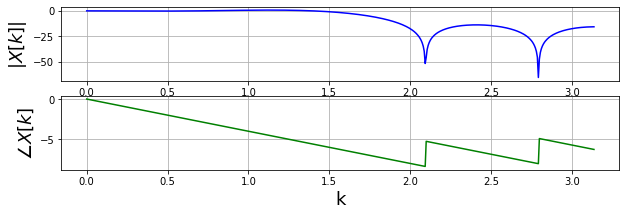

In [56]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
from scipy import signal

M = 8
N = M + 1

absH = [1, 1, 1, 0, 0, 0, 0, 1, 1]
alpha = (N-1)/2

h = np.zeros(N)

for n in range (0,N):
    arg = 0
    f = int((N -1)/2)
    for k in range(1,f):
        arg = arg + 2*absH[k]*np.cos((2*np.pi*k*(n-alpha))/N)
    h[n] = (1/N)*(arg + absH[0])

Hk = abs(scp.fft(h))

print(h)

w, Hk = signal.freqz(h)

fig,ax=plt.subplots(2)
fig.set_size_inches((10,3))

ax[0].plot(w, 20 * np.log10(abs(Hk)), 'b')
ax[0].set_xlabel('k',fontsize=18)
ax[0].set_ylabel(r'$|X[k]|$',fontsize=18)
ax[0].grid()


angles = np.unwrap(np.angle(Hk))
ax[1].plot(w, angles, 'g')
ax[1].set_xlabel('k',fontsize=18)
ax[1].set_ylabel(r'$\angle X[k]$',fontsize=18)
ax[1].grid()



### <font color='blue'> Projeto de Filtros FIR por Janelas </color>

Neste método aplica-se a transformada de Fourier inversa na resposta em frequência ideal do filtro, que dependendo do tipo do filtro obtém-se

Tipo do Filtro | $h(n)$ | $h(0)$
:-:|:-:|:-:
Passa-baixas |$2f_c\frac{\sin(n\omega_c)}{n\omega_c}$|$2f_c$
Passa-altas|$-2f_c\frac{\sin(n\omega_c)}{n\omega_c}$|$1 - 2f_c$
Passa-faixa|$2f_2\frac{\sin(n\omega_2)}{n\omega_2} - 2f_1\frac{\sin(n\omega_1)}{n\omega_1}$|$2(f_2 - f_1)$
Rejeita-faixa|$2f_1\frac{\sin(n\omega_1)}{n\omega_1} - 2f_2\frac{\sin(n\omega_2)}{n\omega_1}$|$1 - 2(f_2 - f_1)$
                                             

sendo $f_c$ a frequência de corte, $f_1$ e $f_2$ as frequências da banda de passgem (ou rejeição) do filtro.

Apesar de ser um método simples, a melhor aproximação da resposta ideal é utilizar um número infinito de coeficientes, o que não é prático. Podemos truncar a quantidade de coeficiantes, e como mostrado pelo fenômeno de Gibbs ocorrerá uma introdução de *ripples* e *overshoots* na resposta obtida.

Para minimizar esse problema podemos utilizar multiplicar $h(n)$ por uma função que seja finita e que tenha resposta em frequência que rapidamente decaia para zero. Esse função é conhecida como janela $w(n)$ (daqui se deriva o nome do método), e o simples fato de truncar $h(n)$ pode ser visto como a sua multiplicação por uma janela retangular.

A escolha da janela está relacionada ao comportamento desejado da faixa de transição e da ordem do filtro. Por exemplo, pode-se utilizar uma janela do tipo Hamming cuja expressão é dada por
$$ w(n) = 0,54 + 0,46\cos(\frac{2\pi}{M}),\ n = 0, 1, ..., M.$$ Na figura abaixo estão as respostas ao impulso de uma janela retangular $w_r(n)$ e da janela de Hamming $w_H(n)$ para um mesmo $M$, e as respectivas respostas em frequência.

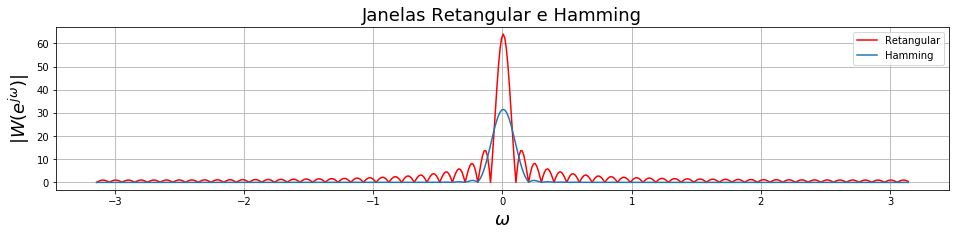

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp

L = 64 # Tamanho da Janela

fig,ax=plt.subplots(1)
fig.set_size_inches((16,3))
eixo_x = np.linspace(-np.pi,np.pi,512)

n = np.arange(0,L)

# Janela retangular
w_rect = np.ones(L)

W_RECT = scp.fft(w_rect,512)

# Faz um deslocamento nas frequências
W_RECT_shifted = np.fft.fftshift(W_RECT)

# Janela de Hanning
w_hamm = 0.5 - 0.5*np.cos(2*np.pi*n/(L-1))

W_HAMM = scp.fft(w_hamm,512)

# Faz um deslocamento nas frequências
W_HAMM_shifted = np.fft.fftshift(W_HAMM)

# Desenha módulo da resposta em frequência da Janela Retangular
ax.plot(eixo_x, abs(W_RECT_shifted),'r-',label='Retangular')
ax.set_xlabel('$\omega$',fontsize=18)
ax.set_ylabel('$|W(e^{j\omega})|$',fontsize=18)
ax.set_title('Janelas Retangular e Hamming',fontsize=18)
ax.grid()

# Desenha módulo da resposta em frequência da Janela de Hamming
ax.plot(eixo_x, abs(W_HAMM_shifted),label='Hamming')
ax.legend(loc=0);

Observe que a resposta em frequência da janela da Hamming descresce mais suvamente do que a da janela retangular, porém tem um largura de transição maior. Na tabela abaixo estão listadas algumas janelas e suas características.

Janela | Largura de transição normalizada (Hz) | Ripple banda de passagem (dB) | Relação entre lóbulo principal e lóbulo lateral (dB) | Máxima atenuanção banda rejeição (dB) | Equação
:-:|:-:|:-:|:-:|:-: |:-:
Retangular | $\frac{0,9}{N}$ | 0,07416 | 13 | 21 | 1 
Hanning| $\frac{3,1}{N}$| 0,0546 | 31 | 44 | $0,5 + 0,5\cos\left(\frac{2\pi n}{M+1}\right)$ 
Hamming|$\frac{3,3}{N}$| 0,0194 | 41 | 53 | $0,54 + 0,46\cos\left(\frac{2\pi n}{M+1}\right)$
Blacman| $\frac{5,5}{N}$| 0,017 | 57 | 75 | $0,42 + 0,5\cos\left(\frac{2\pi n}{M}\right) + 0,08\cos\left(\frac{4\pi n}{M} \right)$
Kaiser|$\begin{array}{c} \frac{2,93}{N}\ (\beta = 4,54) \\ \frac{4,32}{N}\ \beta = 6,76 \\ \frac{5,71}{N}\ (\beta= 8,96)\end{array}$ | $\begin{array}{c} 0,0274 \\ 0,00275 \\ 0,000275\end{array}$ |  | $\begin{array}{c} 50 \\ 70 \\ 90\end{array}$ | $\frac{I_0(\beta\{1 - [2n/(N-1)]ˆ2\}^{1/2})}{I_0(\beta)}$


**Exemplo:** Seja um filtro rejeita-faixas com $M = 80$, $\Omega_1 = 2.000 rad/s$, $\Omega_2 = 4.000 rad/s$ e $\Omega_s = 10.000 rad/s$.

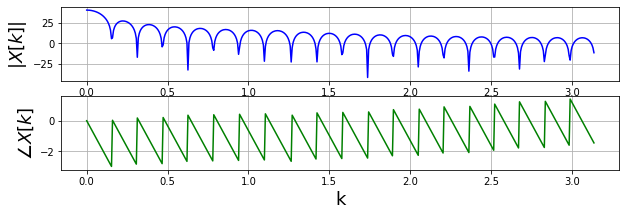

In [22]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
from scipy import signal
systems = ['Windows', 'macOS', 'Linux']

M = 80

Omega_1 = 2000
Omega_2 = 4000
Omega_s = 10000

w1 = Omega_1*2*np.pi/Omega_s
w2 = Omega_2*2*np.pi/Omega_2

h0  = 1 - (w1 -w2)/np.pi

haux = np.zeros(int(M/2))
for n in range (1,int(M/2)):
    haux[n] = (np.sin(w1*n) - np.sin(w2)*n)/(np.pi*n)

    
h = haux[::-1] + h0 + haux

w, Hk = signal.freqz(h)

fig,ax=plt.subplots(2)
fig.set_size_inches((10,3))

ax[0].plot(w, 20 * np.log10(abs(Hk)), 'b')
ax[0].set_xlabel('k',fontsize=18)
ax[0].set_ylabel(r'$|X[k]|$',fontsize=18)
ax[0].grid()

angles = np.unwrap(np.angle(Hk))
ax[1].plot(w, angles, 'g')
ax[1].set_xlabel('k',fontsize=18)
ax[1].set_ylabel(r'$\angle X[k]$',fontsize=18)
ax[1].grid()


**Exemplo:** Seja a seguinte especificação:

In [110]:
Ns =  300 # número de amostras 
N = 1024 # tamanho da DFT

fs = 1e3 # taxa de amostragem em Hz
fpass = 100 # em Hz
fstop = 150 # em Hz
delta = 60 # em dB, atenuação desejada na banda de rejeição

Vamos usar a função fir_filter_design.kaiserord() para obter os parâmetros do filtro. 

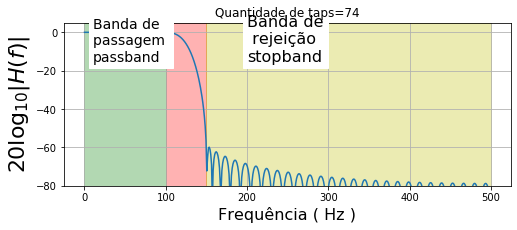

In [111]:
from __future__ import  division
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt


# Apenas para janelas do tipo Kayser
M,beta= signal.fir_filter_design.kaiserord(delta, (fstop-fpass)/(fs/2.))

# Para os demais filtros
#M = 88
#hn = signal.firwin(M,(fstop+fpass)/2.,window=('hamm'),nyq=fs/2.)
hn = signal.firwin(M,(fstop+fpass)/2.,window=('kaiser',beta),nyq=fs/2.)

w,H = signal.freqz(hn) # resposta em frequência

fig,ax = plt.subplots()
fig.set_size_inches((8,3))

ax.plot(w/np.pi*fs/2.,20*np.log10(abs(H)))
ax.set_xlabel("Frequência ( Hz )",fontsize=16)
ax.set_ylabel(r"$20\log_{10} |H(f)| $",fontsize=22)
ymin,ymax = -80,5
ax.axis(ymin = ymin,ymax=ymax)
ax.add_patch(Rectangle((0,ymin),width=fpass,height=ymax-ymin,color='g',alpha=0.3))
ax.add_patch(Rectangle((fpass,ymin),width=fstop-fpass,height=ymax-ymin,color='r',alpha=0.3))
ax.add_patch(Rectangle((fstop,ymin),width=fs/2-fstop,height=ymax-ymin,color='y',alpha=0.3))
ax.set_title("Quantidade de taps=%d"%M)
ax.text(10,-15,'Banda de \npassagem \npassband',fontsize=14,bbox=dict(color='white'))
ax.text(200,-15,'Banda de\n rejeição\nstopband',fontsize=16,bbox=dict(color='white'))
ax.grid()

### Example

Vamos considerar um sinal com dois tons, e aplicar o filtro projetado.

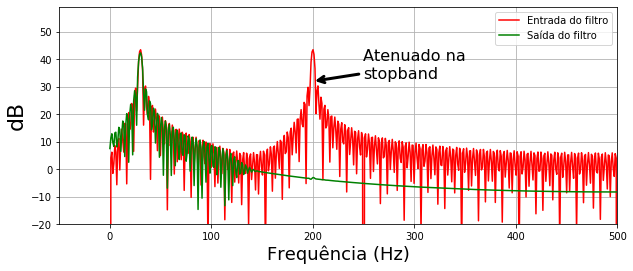

In [112]:
# two-tone example using filter
import scipy as scp

t = np.arange(0,Ns)/fs
x = np.cos(2*np.pi*30*t)+np.cos(2*np.pi*200*t)
X = scp.fft(x,N)

y=signal.lfilter(hn,1,x)
Y = scp.fft(y,N)

fig,ax = plt.subplots()
fig.set_size_inches((10,4))
ax.plot(np.arange(N)/N*fs,20*np.log10(abs(X)),'r-',label='Entrada do filtro')
ax.plot(np.arange(N)/N*fs,20*np.log10(abs(Y)),'g-',label='Saída do filtro')
ax.set_xlim(xmax = fs/2)
ax.set_ylim(ymin=-20)
ax.set_ylabel(r'dB',fontsize=22)
ax.set_xlabel("Frequência (Hz)",fontsize=18)
ax.grid()
ax.annotate('Atenuado na \nstopband',fontsize=16,xy=(200,32),
             xytext=(50,3),textcoords='offset points',
             arrowprops=dict(arrowstyle='->',lw=3),
            )
ax.legend(loc=0);

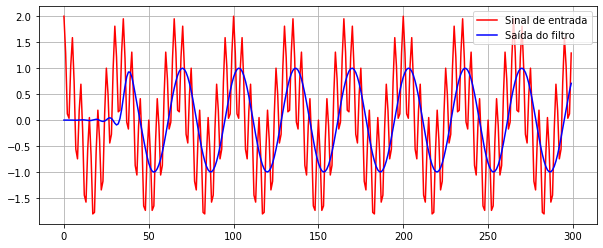

In [113]:
fig,ax = plt.subplots()
fig.set_size_inches((10,4))

# Sinal de entrada
ax.plot(x,'r-',label='Sinal de entrada')

# Sinal filtrado
ax.plot(y,'b-',label='Saída do filtro')
ax.legend(loc=0);
ax.grid()